In [6]:
import cv2 as cv
import torch
import xml.etree.ElementTree as ET  
from collections import namedtuple
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

In [11]:
# Function that parses the staff xml and stores it in a named tuple
Staff = namedtuple('Staff', 'filename height space column row rot model staffs')
def staff_xml(filename):
    tree = ET.parse(filename)
    root = tree.getroot()
    
    fn = root[0].text
    height = int(root[1][0].text)
    space = int(root[1][1].text)
    column = int(root[1][2].text)
    row = int(root[1][3].text)
    rot = float(root[1][4].text)
    model = [float(gradient) for gradient in str.split(root[1][5].text)]
    staffs = [int(staff.text) for staff in root[2]]

    return Staff(fn, height, space, column, row, rot, model, staffs)

# Parsing all the staff description xml files for both datasets
artificial_fn = '../datasets/Artificial/'
artificial_files = [f for f in listdir(artificial_fn) if isfile(join(artificial_fn, f))]
handwritten_fn = '../datasets/Handwritten/'
handwritten_files = [f for f in listdir(handwritten_fn) if isfile(join(handwritten_fn, f))]

artificial_staffs = [staff_xml(artificial_fn + f) for f in artificial_files]
handwritten_staffs = [staff_xml(handwritten_fn + f) for f in handwritten_files]

In [3]:
# Parsing both datasets' groundtruths
deepscores_fn = '../../data/DEEPSCORES/images_png/'
deepscores_gt_fn = '../../data/DEEPSCORES/xml_annotations/'
muscima_fn = '../../data/MUSCIMA/CvcMuscima-Distortions/'
muscima_gt_fn = '../../data/MUSCIMA/v1.0/data/cropobjects_manual/'

def deepscores_gt(fn=deepscores_gt_fn):
    return

def muscima_gt(fn=muscima_gt_fn):
    return

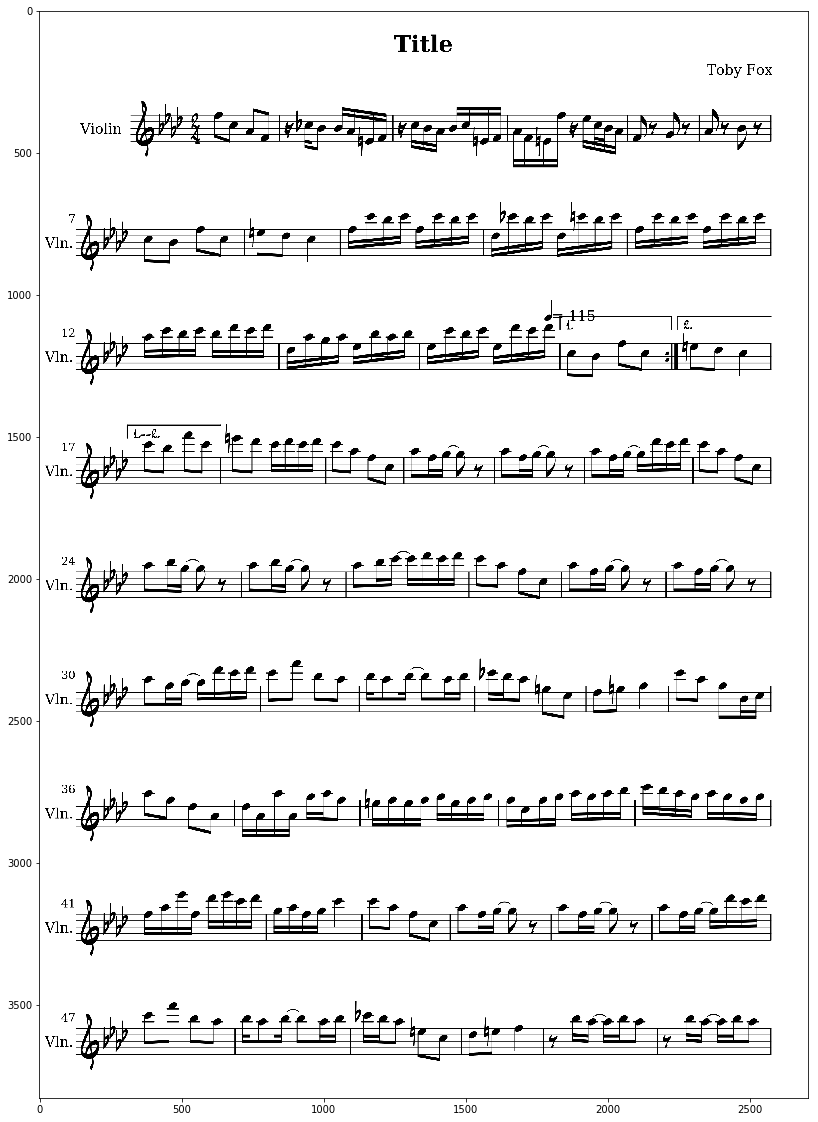

In [10]:
img = cv.imread(deepscores_fn + artificial_staffs[0].filename, cv.CV_8UC1)
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray');